In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

In [2]:
## import the data

df = pd.read_csv('../input/heart-diseases-data/heart_deases_data.csv',delim_whitespace=True)

In [3]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic,maximum_heart_rate_achieved,exercise_induced_angina,depression,peak_exercise_ST,vessels_block,thal,class
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1


In [4]:
correlation = df.corr()

In [5]:
correlation

,age,sex,chest_pain_type,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic,maximum_heart_rate_achieved,exercise_induced_angina,depression,peak_exercise_ST,vessels_block,thal,class
age,1.000000,-0.094401,0.096920,0.273053,0.220056,0.123458,0.128171,-0.402215,0.098297,0.194234,0.159774,0.356081,0.106100,0.212322
sex,-0.094401,1.000000,0.034636,-0.062693,-0.201647,0.042140,0.039253,-0.076101,0.180022,0.097412,0.050545,0.086830,0.391046,0.297721
chest_pain_type,0.096920,0.034636,1.000000,-0.043196,0.090465,-0.098537,0.074325,-0.317682,0.353160,0.167244,0.136900,0.225890,0.262659,0.417436
resting_blood_pressure,0.273053,-0.062693,-0.043196,1.000000,0.173019,0.155681,0.116157,-0.039136,0.082793,0.222800,0.142472,0.085697,0.132045,0.155383
serum_cholestoral,0.220056,-0.201647,0.090465,0.173019,1.000000,0.025186,0.167652,-0.018739,0.078243,0.027709,-0.005755,0.126541,0.028836,0.118021
fasting_blood_sugar,0.123458,0.042140,-0.098537,0.155681,0.025186,1.000000,0.053499,0.022494,-0.004107,-0.025538,0.044076,0.123774,0.049237,-0.016319
resting_electrocardiographic,0.128171,0.039253,0.074325,0.116157,0.167652,0.053499,1.000000,-0.074628,0.095098,0.120034,0.160614,0.114368,0.007337,0.182091
maximum_heart_rate_achieved,-0.402215,-0.076101,-0.317682,-0.039136,-0.018739,0.022494,-0.074628,1.000000,-0.380719,-0.349045,-0.386847,-0.265333,-0.253397,-0.418514
exercise_induced_angina,0.098297,0.180022,0.353160,0.082793,0.078243,-0.004107,0.095098,-0.380719,1.000000,0.274672,0.255908,0.153347,0.321449,0.419303
depression,0.194234,0.097412,0.167244,0.222800,0.027709,-0.025538,0.120034,-0.349045,0.274672,1.000000,0.609712,0.255005,0.324333,0.417967


In [6]:
## plot correlation

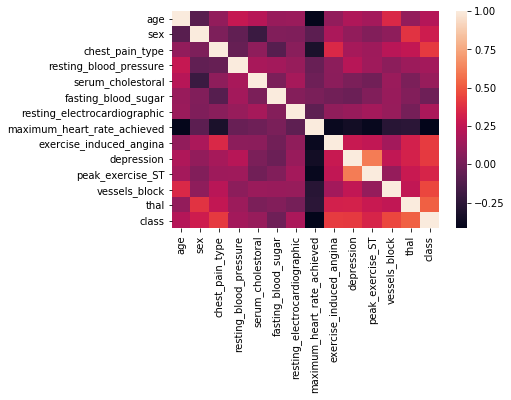

In [7]:
import seaborn as sns
sns.heatmap(correlation)

In [8]:
## extract the target from the data
## this time target is three 
## 1) chest_pain_type
## 2) depression
## 3) class

In [9]:
X = df.drop('class',axis=1)

In [10]:
X.head()

,age,sex,chest_pain_type,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic,maximum_heart_rate_achieved,exercise_induced_angina,depression,peak_exercise_ST,vessels_block,thal
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0


In [11]:
Y = df[['class']]

In [12]:
Y.head()

,class
0,2
1,1
2,2
3,1
4,1


In [13]:
## normalize the feature matrix

In [14]:
#  def normalize(df):
#      return (df-df.mean())/df.std()

In [15]:
# X = normalize(X)

In [16]:
X ## after normalization

,age,sex,chest_pain_type,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic,maximum_heart_rate_achieved,exercise_induced_angina,depression,peak_exercise_ST,vessels_block,thal
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52.0,1.0,3.0,172.0,199.0,1.0,0.0,162.0,0.0,0.5,1.0,0.0,7.0
266,44.0,1.0,2.0,120.0,263.0,0.0,0.0,173.0,0.0,0.0,1.0,0.0,7.0
267,56.0,0.0,2.0,140.0,294.0,0.0,2.0,153.0,0.0,1.3,2.0,0.0,3.0
268,57.0,1.0,4.0,140.0,192.0,0.0,0.0,148.0,0.0,0.4,2.0,0.0,6.0


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = .2)

In [19]:
x_train.head()

,age,sex,chest_pain_type,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic,maximum_heart_rate_achieved,exercise_induced_angina,depression,peak_exercise_ST,vessels_block,thal
264,48.0,1.0,2.0,110.0,229.0,0.0,0.0,168.0,0.0,1.0,3.0,0.0,7.0
100,44.0,0.0,3.0,108.0,141.0,0.0,0.0,175.0,0.0,0.6,2.0,0.0,3.0
102,49.0,0.0,4.0,130.0,269.0,0.0,0.0,163.0,0.0,0.0,1.0,0.0,3.0
165,64.0,0.0,4.0,180.0,325.0,0.0,0.0,154.0,1.0,0.0,1.0,0.0,3.0
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0


In [20]:
x_test.head()

,age,sex,chest_pain_type,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic,maximum_heart_rate_achieved,exercise_induced_angina,depression,peak_exercise_ST,vessels_block,thal
23,47.0,1.0,4.0,112.0,204.0,0.0,0.0,143.0,0.0,0.1,1.0,0.0,3.0
145,53.0,1.0,4.0,123.0,282.0,0.0,0.0,95.0,1.0,2.0,2.0,2.0,7.0
184,53.0,1.0,3.0,130.0,246.0,1.0,2.0,173.0,0.0,0.0,1.0,3.0,3.0
124,54.0,1.0,3.0,125.0,273.0,0.0,2.0,152.0,0.0,0.5,3.0,1.0,3.0
176,51.0,1.0,4.0,140.0,298.0,0.0,0.0,122.0,1.0,4.2,2.0,3.0,7.0


In [21]:
y_test.head()

,class
23,1
145,2
184,1
124,1
176,2


In [22]:
y_train.head()

,class
264,2
100,1
102,1
165,1
3,1


In [23]:
print (x_train.shape)
print (x_test.shape)
print (y_train.shape)
print (y_test.shape)


(216, 13)
(54, 13)
(216, 1)
(54, 1)


In [24]:
n_col = x_train.shape[1]  ## find th column number

In [25]:
n_col

13

In [26]:
from keras.layers import Input
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [27]:
def neural_net():
    model = Sequential()
    model.add(Dense(512, input_dim=n_col, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(.2))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(.2))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(.2))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(.2))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(.2))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(.2))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(.2))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    # Compile model
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [28]:
model = neural_net()

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               7168      
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)              

In [30]:
history = model.fit(x_train, y_train, epochs=300, batch_size=10)


Epoch 1/300
216/216 [==============================] - 1s 5ms/step - loss: 1.7170 - accuracy: 0.4769
Epoch 2/300
216/216 [==============================] - 0s 797us/step - loss: 0.7570 - accuracy: 0.5093
Epoch 3/300
216/216 [==============================] - 0s 784us/step - loss: 0.7646 - accuracy: 0.5231
Epoch 4/300
216/216 [==============================] - 0s 773us/step - loss: 0.7284 - accuracy: 0.4722
Epoch 5/300
216/216 [==============================] - 0s 780us/step - loss: 0.7013 - accuracy: 0.5648
Epoch 6/300
216/216 [==============================] - 0s 775us/step - loss: 0.7640 - accuracy: 0.5000
Epoch 7/300
216/216 [==============================] - 0s 791us/step - loss: 0.7543 - accuracy: 0.4815
Epoch 8/300
216/216 [==============================] - 0s 844us/step - loss: 0.7031 - accuracy: 0.5324
Epoch 9/300
216/216 [==============================] - 0s 820us/step - loss: 0.6875 - accuracy: 0.5648
Epoch 10/300
216/216 [==============================] - 0s 863us/step - los

dict_keys(['loss', 'accuracy'])


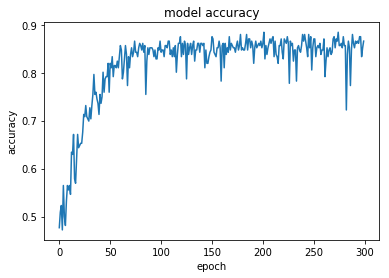

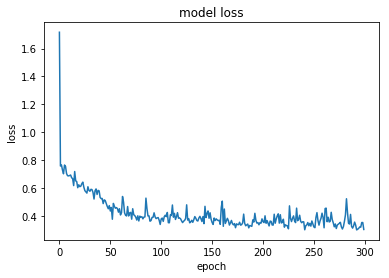

In [31]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()



In [32]:
loss,accuracy = model.evaluate(x_test,y_test)

54/54 [==============================] - 0s 2ms/step


In [33]:
print ("Accuracy "+str(accuracy*100)+"%")

Accuracy 83.33333134651184%


In [34]:
predict = model.predict(x_test)

In [35]:
predict

array([[3.82831513e-06, 8.84821594e-01, 1.15174569e-01],
       [0.00000000e+00, 6.32004227e-10, 1.00000000e+00],
       [1.17055548e-04, 3.60351413e-01, 6.39531493e-01],
       [2.95647100e-04, 4.09793735e-01, 5.89910626e-01],
       [0.00000000e+00, 7.77290897e-14, 1.00000000e+00],
       [2.97788683e-05, 3.29060644e-01, 6.70909584e-01],
       [1.80495772e-05, 3.18055660e-01, 6.81926250e-01],
       [5.65490776e-18, 9.99889731e-01, 1.10230954e-04],
       [1.93541754e-12, 8.43927637e-02, 9.15607154e-01],
       [0.00000000e+00, 8.25721963e-06, 9.99991775e-01],
       [6.55726490e-06, 2.96601117e-01, 7.03392267e-01],
       [5.67986040e-14, 9.98878181e-01, 1.12186407e-03],
       [3.90626701e-05, 7.80110240e-01, 2.19850719e-01],
       [1.04093535e-12, 7.96956867e-02, 9.20304298e-01],
       [6.13167431e-05, 7.53467739e-01, 2.46470913e-01],
       [7.12460969e-05, 7.44359136e-01, 2.55569607e-01],
       [1.80371062e-04, 5.45334339e-01, 4.54485178e-01],
       [0.00000000e+00, 7.24524

In [36]:
predict = pd.DataFrame(predict)

In [37]:
predicted_value={"chest_pain_type":predict[0],"depression":predict[1],"class":predict[2]}

In [38]:
ans = pd.DataFrame(predicted_value)

In [39]:
ans = ans.round().astype('int')

In [40]:
y_test = y_test.astype('int')

In [41]:
y_test

,class
23,1
145,2
184,1
124,1
176,2
137,2
203,2
251,1
70,2
120,2


In [42]:
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix

In [43]:
class_confusion_matrix = confusion_matrix(ans['class'],y_test['class'])

In [44]:
class_confusion_matrix

array([[ 0, 27,  3],
       [ 0,  6, 18],
       [ 0,  0,  0]])

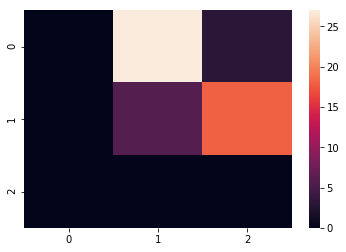

In [45]:
sns.heatmap(class_confusion_matrix)